# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.cm as cm
from scipy.stats import spearmanr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from obspy.geodetics import gps2dist_azimuth

from scipy.signal import correlate

# General Variables

In [2]:
station_list = ['AIO', 'CAVT', 'CSLB', 'HAGA', 'MSDA', 'MUCR', 'WDD']
frequency_bands = ["0.05-0.2", "0.2-0.35", "0.35-0.5", "0.5-0.65", "0.65-0.8", "0.8-0.95",
                   "0.95-1.1", "1.1-1.25", "1.25-1.4", "1.4-1.55", "1.55-1.7", "1.7-1.85", "1.85-2.0"]
channels = ["Z", "N", "E"]

nearest_grid_points = {
    "AIO": [(37.8958, 15.3333), (37.9375, 15.375), (37.8958, 15.375), (37.8542, 15.3333), (37.9792, 15.4167)],
    "CAVT": [(37.5625, 12.75), (37.5625, 12.7917), (37.5625, 12.7083), (37.5625, 12.8333), (37.5625, 12.6667)],
    "CSLB": [(38.0625, 14.0417), (38.0625, 14.0833), (38.0625, 14.0), (38.0625, 14.125), (38.0208, 13.9167)],
    "HAGA": [(37.3125, 15.1667), (37.3125, 15.125), (37.3125, 15.2083), (37.3542, 15.1667), (37.3542, 15.125)],
    "MSDA": [(35.9375, 14.5417), (35.8958, 14.5833), (35.9792, 14.5), (35.9792, 14.4583), (35.9375, 14.5833)],
    "MUCR": [(38.1875, 14.875), (38.1875, 14.8333), (38.1875, 14.7917), (38.1875, 14.9583), (38.1458, 14.7083)],
    "WDD": [(35.8542, 14.5833), (35.8125, 14.5833), (35.8125, 14.4583), (35.7708, 14.5417), (35.7708, 14.5)]
}

station_lats = [37.9712, 37.68, 37.94, 37.29, 35.901233, 38.04, 35.837299]
station_lons = [15.233, 12.76, 14.06, 15.16, 14.486952, 14.87, 14.5242]

station_colours = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

#raw data
path_lat = "Processed Data/SEA_data_lat.parquet"
path_lon = "Processed Data/SEA_data_lon.parquet"
path_Y = "Processed Data/SEA_data_Y.parquet"
path_time = "Processed Data/SEA_data_time.parquet"

# Visualisation of Raw Sea Data

In [3]:
df_lat = pd.read_parquet(path_lat)
df_lon = pd.read_parquet(path_lon)
df_Y = pd.read_parquet(path_Y)
df_time = pd.read_parquet(path_time)

C:\Users\erika\AppData\Local\Temp\ipykernel_15104\3873685996.py:15: RuntimeWarning: Mean of empty slice
  Y_avg = np.nanmean(Y, axis=0)


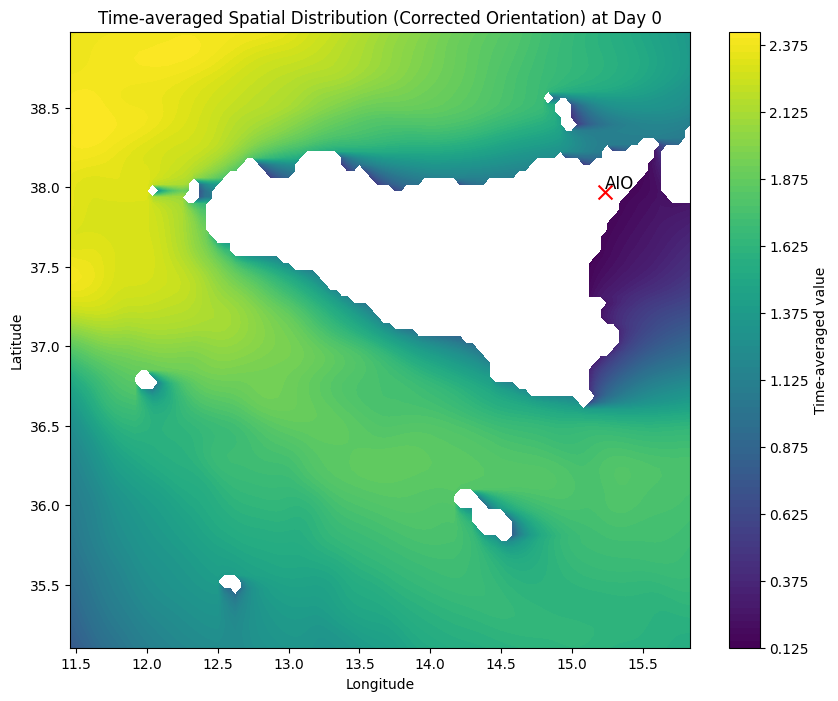

In [4]:
daynumber = 0
startpoint=daynumber*24
endpoint=(daynumber+1)*24

#Visualise 1 day of data on a map
Y = df_Y[startpoint:endpoint]
lat = np.array(df_lat).squeeze()
lon = np.array(df_lon).squeeze()

#Extract unique latitude and longitude values from the 2D arrays
lat = np.unique(lat[:, 0]) #Use the first column to extract unique latitudes
lon = np.unique(lon[0, :]) #Use the first row to extract unique longitudes

#Compute time-averaged data. ignoring nans. result of a whole column of nans is nan
Y_avg = np.nanmean(Y, axis=0)
Y_avg_reshaped = Y_avg.reshape(len(lat), len(lon))

#Create the heatmap
plt.figure(figsize=(10, 8))
plt.contourf(lon, lat, Y_avg_reshaped, levels=100, cmap='viridis')
plt.colorbar(label='Time-averaged value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f"Time-averaged Spatial Distribution (Corrected Orientation) at Day {daynumber}")

plt.scatter(station_lons[0], station_lats[0], color='red', marker='x', s=100, label=station_list[0])
plt.text(station_lons[0], station_lats[0], station_list[0], color='black', fontsize=12, ha='left', va='bottom')

plt.show()

C:\Users\erika\AppData\Local\Temp\ipykernel_15104\597304752.py:15: RuntimeWarning: Mean of empty slice
  Y_avg = np.nanmean(Y, axis=0)


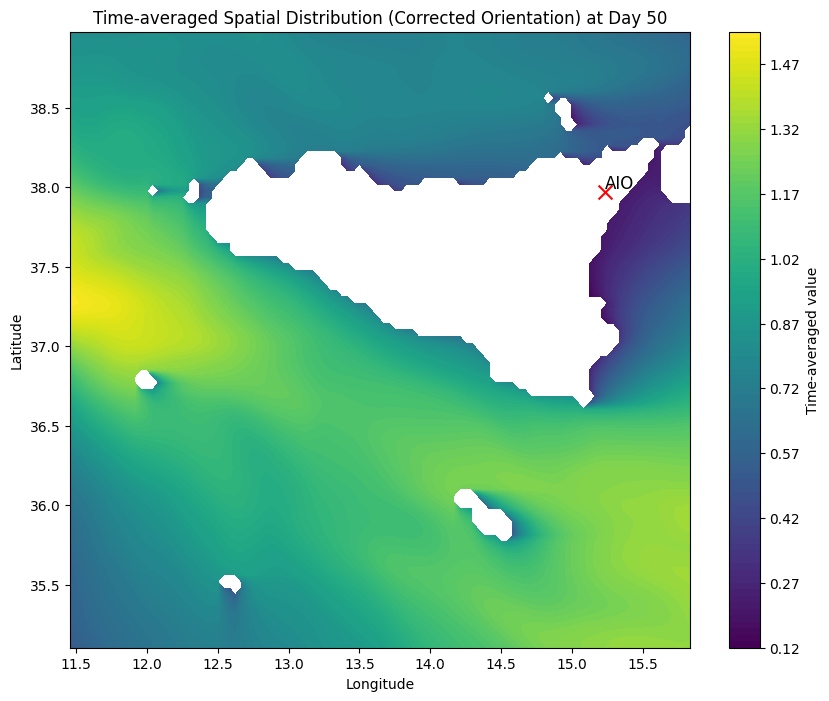

In [5]:
daynumber = 50
startpoint=daynumber*24
endpoint=(daynumber+1)*24

#Visualise 1 day of data on a map
Y = df_Y[startpoint:endpoint]
lat = np.array(df_lat).squeeze()
lon = np.array(df_lon).squeeze()

#Extract unique latitude and longitude values from the 2D arrays
lat = np.unique(lat[:, 0]) #Use the first column to extract unique latitudes
lon = np.unique(lon[0, :]) #Use the first row to extract unique longitudes

#Compute time-averaged data. ignoring nans. result of a whole column of nans is nan
Y_avg = np.nanmean(Y, axis=0)
Y_avg_reshaped = Y_avg.reshape(len(lat), len(lon))

#Create the heatmap
plt.figure(figsize=(10, 8))
plt.contourf(lon, lat, Y_avg_reshaped, levels=100, cmap='viridis')
plt.colorbar(label='Time-averaged value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f"Time-averaged Spatial Distribution (Corrected Orientation) at Day {daynumber}")

plt.scatter(station_lons[0], station_lats[0], color='red', marker='x', s=100, label=station_list[0])
plt.text(station_lons[0], station_lats[0], station_list[0], color='black', fontsize=12, ha='left', va='bottom')

plt.show()

C:\Users\erika\AppData\Local\Temp\ipykernel_15104\3649251393.py:15: RuntimeWarning: Mean of empty slice
  Y_avg = np.nanmean(Y, axis=0)


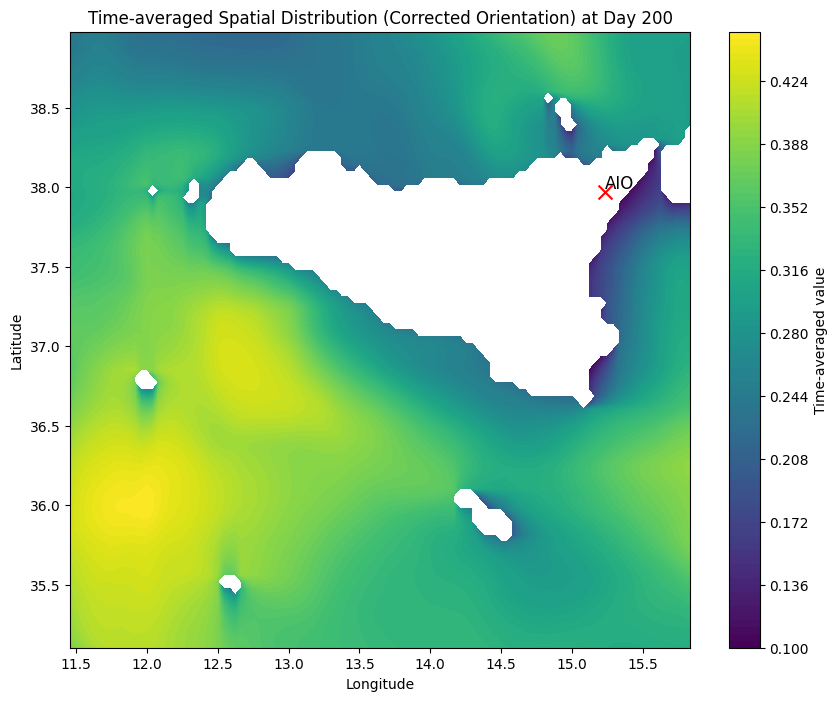

In [6]:
daynumber = 200
startpoint=daynumber*24
endpoint=(daynumber+1)*24

#Visualise 1 day of data on a map
Y = df_Y[startpoint:endpoint]
lat = np.array(df_lat).squeeze()
lon = np.array(df_lon).squeeze()

#Extract unique latitude and longitude values from the 2D arrays
lat = np.unique(lat[:, 0]) #Use the first column to extract unique latitudes
lon = np.unique(lon[0, :]) #Use the first row to extract unique longitudes

#Compute time-averaged data. ignoring nans. result of a whole column of nans is nan
Y_avg = np.nanmean(Y, axis=0)
Y_avg_reshaped = Y_avg.reshape(len(lat), len(lon))

#Create the heatmap
plt.figure(figsize=(10, 8))
plt.contourf(lon, lat, Y_avg_reshaped, levels=100, cmap='viridis')
plt.colorbar(label='Time-averaged value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f"Time-averaged Spatial Distribution (Corrected Orientation) at Day {daynumber}")

plt.scatter(station_lons[0], station_lats[0], color='red', marker='x', s=100, label=station_list[0])
plt.text(station_lons[0], station_lats[0], station_list[0], color='black', fontsize=12, ha='left', va='bottom')

plt.show()

# Mount Etna

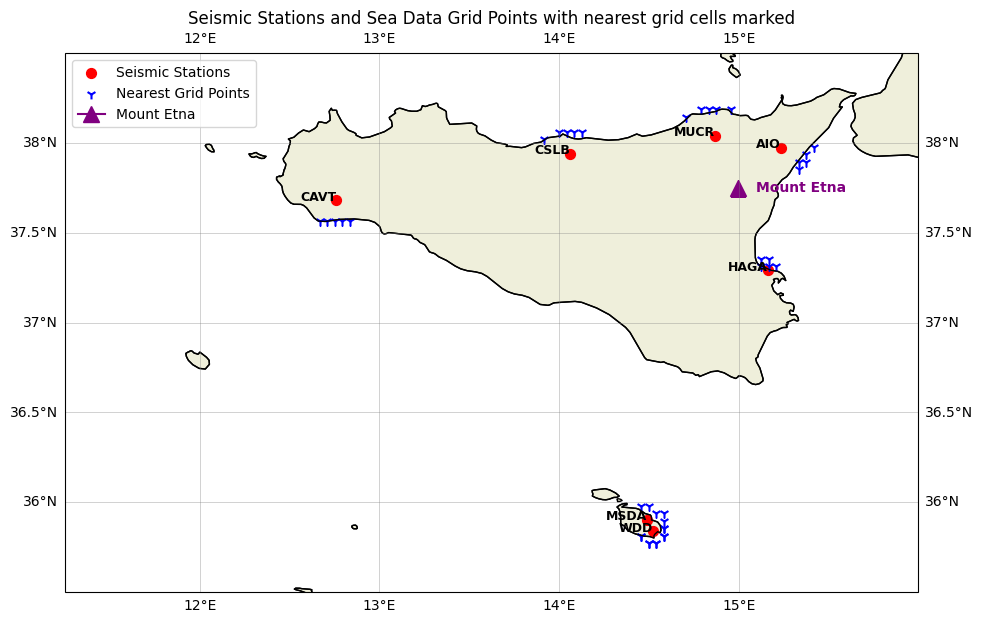

In [7]:
#create the plot
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
ax.set_extent([11.25, 16.0, 35.5, 38.5], crs=ccrs.PlateCarree())

#add land features for better visualization
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

#plot seismic stations
ax.scatter(station_lons, station_lats, color='red', marker='o', s=50, label='Seismic Stations')

#annotate station names
for name, lat, lon in zip(station_list, station_lats, station_lons):
    ax.text(lon, lat, name, fontsize=9, fontweight='bold', ha='right', transform=ccrs.PlateCarree())

#plot grid cell locations
#ax.scatter(grid_lons, grid_lats, color='skyblue', marker='1', s=3, label='Sea Grid Points')

#plot nearest grid points for each station-
for station, nearest_points in nearest_grid_points.items():
    #extract the latitudes and longitudes of the nearest points
    nearest_lats, nearest_lons = zip(*nearest_points)
    ax.scatter(nearest_lons, nearest_lats, color='blue', marker='1', s=50)

#mark the label once, outside of thefor loop, so it shows only once in the legend
ax.scatter(nearest_lons, nearest_lats, color='blue', marker='1', s=50, label='Nearest Grid Points')

ax.plot(14.9934, 37.7510, marker='^', color='purple', markersize=12, label='Mount Etna', transform=ccrs.PlateCarree())
ax.text(14.9934 + 0.1, 37.7510, "Mount Etna", fontsize=10, fontweight='bold', color='purple',
        transform=ccrs.PlateCarree(), ha='left', va='center')

#add legend
plt.legend()

#add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

plt.title("Seismic Stations and Sea Data Grid Points with nearest grid cells marked")
plt.show()

# Plot Seismic RMS (all frequencies) and SWH for One Station

In [8]:
station = station_list[0]
mlvariables=pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)] #input variable is columns that start with station name
Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(station)] #target variable are the remaining columns
T = mlvariables.index.tolist() #Time series

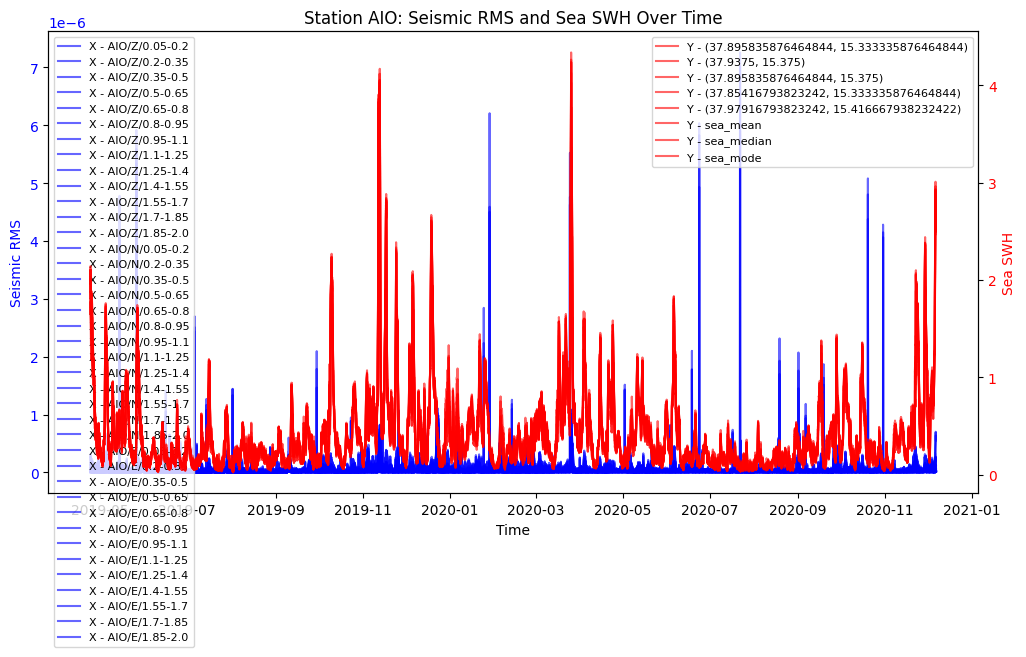

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 6))

#primary y-axis: Seismic RMS
ax1.set_xlabel("Time")
ax1.set_ylabel("Seismic RMS", color="blue")
for col in X.columns:
    ax1.plot(T, X[col], label=f"X - {col}", color="blue", alpha=0.6)

ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="upper left", fontsize=8)

#secondary Y-axis: Sea SWH
ax2 = ax1.twinx()
ax2.set_ylabel("Sea SWH", color="red")
for col in Y.columns:
    ax2.plot(T, Y[col], label=f"Y - {col}", color="red", alpha=0.6)

ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right", fontsize=8)

plt.title(f"Station {station}: Seismic RMS and Sea SWH Over Time")
plt.show()

# Plot Seismic RMS for each station

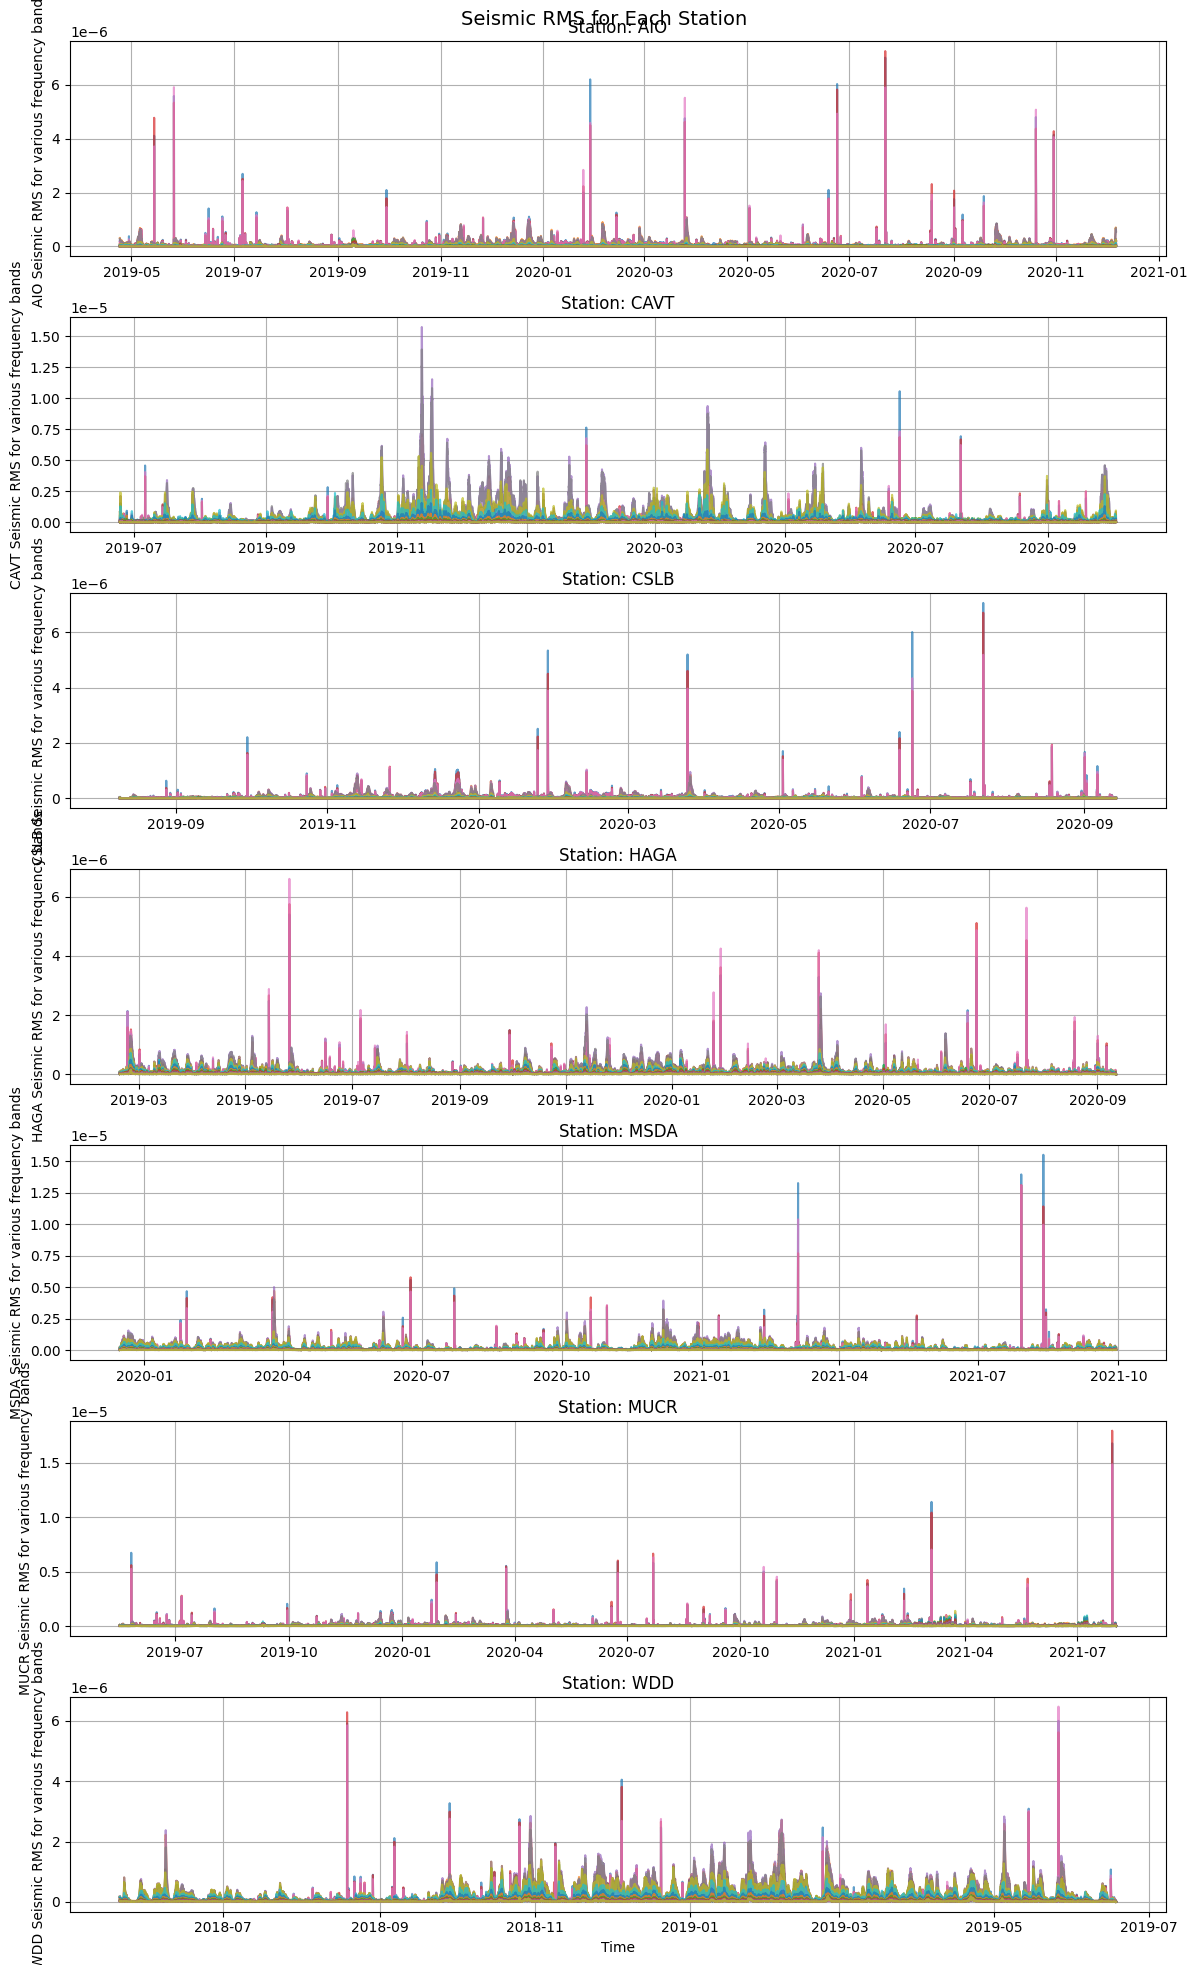

In [10]:
fig, axes = plt.subplots(7, 1, figsize=(12, 20))

for i, station in enumerate(station_list):
    mlvariables = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

    X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)]
    T = mlvariables.index.tolist()
    
    ax = axes[i]
    for col in X.columns:
        ax.plot(T, X[col], label=f"{col}", alpha=0.7)

    ax.set_ylabel(f"{station} Seismic RMS for various frequency bands")
    #ax.legend(fontsize=8)
    ax.grid(True)
    ax.set_title(f"Station: {station}")

axes[-1].set_xlabel("Time")

fig.suptitle("Seismic RMS for Each Station", fontsize=14)
plt.tight_layout()
plt.show()

# Choose a Channel and Band, and View Data for All Stations

In [11]:
#to adjust as needed
selected_band = "0.5-0.65"
selected_channel = "Z"

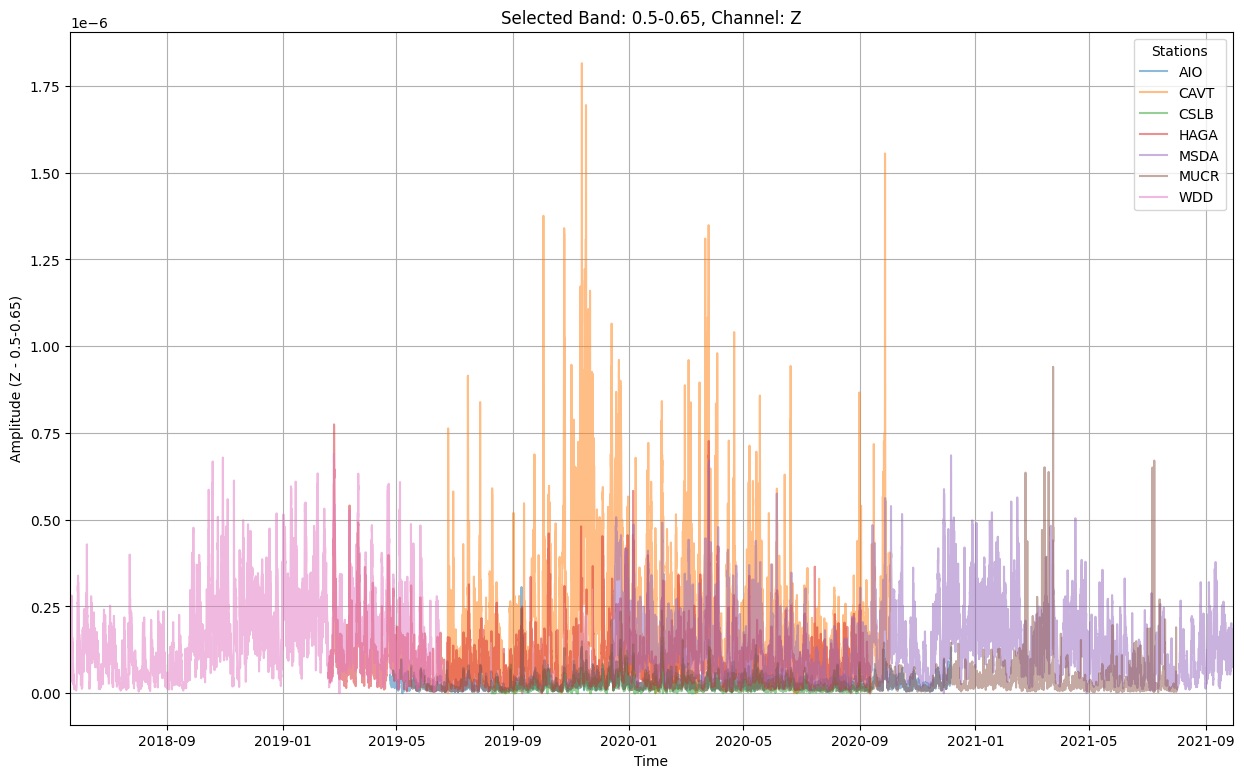

In [12]:
fig, ax = plt.subplots(figsize=(15, 9))

for station in station_list:
    file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
    mlvariables = pd.read_parquet(file_path)

    col_name = f"{station}/{selected_channel}/{selected_band}"

    #check if the selected column exists
    if col_name in mlvariables.columns:
        T = mlvariables.index.tolist()
        ax.plot(T, mlvariables[col_name], label=station, alpha=0.5)
    else:
        print(f"Column {col_name} not found in {file_path}")

ax.set_xlabel("Time")
ax.set_ylabel(f"Amplitude ({selected_channel} - {selected_band})")
ax.legend(title="Stations")
ax.set_title(f"Selected Band: {selected_band}, Channel: {selected_channel}")
ax.grid(True)

#set x limits to earliest start and latest end date and time
ax.set_xlim(pd.Timestamp("2018-05-21 12:00:00+00:00"), pd.Timestamp("2021-09-29 11:00:00+00:00"))

plt.show()

# Choose One Station and View Seismic RMS

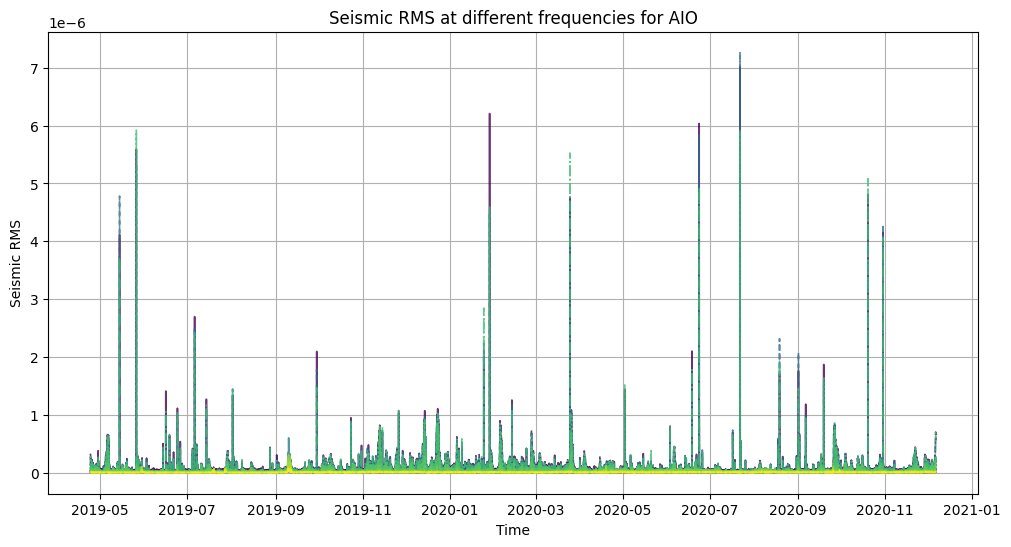

In [13]:
selected_station = "AIO"

file_path = f"Processed Data/15.03.2025 Data/{selected_station}.parquet"
mlvariables = pd.read_parquet(file_path)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(selected_station)]
T = mlvariables.index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))

colors = cm.viridis(np.linspace(0, 1, len(X.columns)))
linestyles = ['-', '--', '-.', ':']

for i, (col, color) in enumerate(zip(X.columns, colors)):
    linestyle = linestyles[i % len(linestyles)]  #use different linestyles for better legibility
    ax.plot(T, X[col], label=col, color=color, linestyle=linestyle, alpha=0.8, linewidth=1.2)

ax.set_xlabel("Time")
ax.set_ylabel("Seismic RMS")
#ax.legend(fontsize=8, loc="upper left", ncol=2, frameon=False)
ax.set_title(f"Seismic RMS at different frequencies for {selected_station}")
ax.grid(True)

plt.show()

# Choose One Station and View SWH

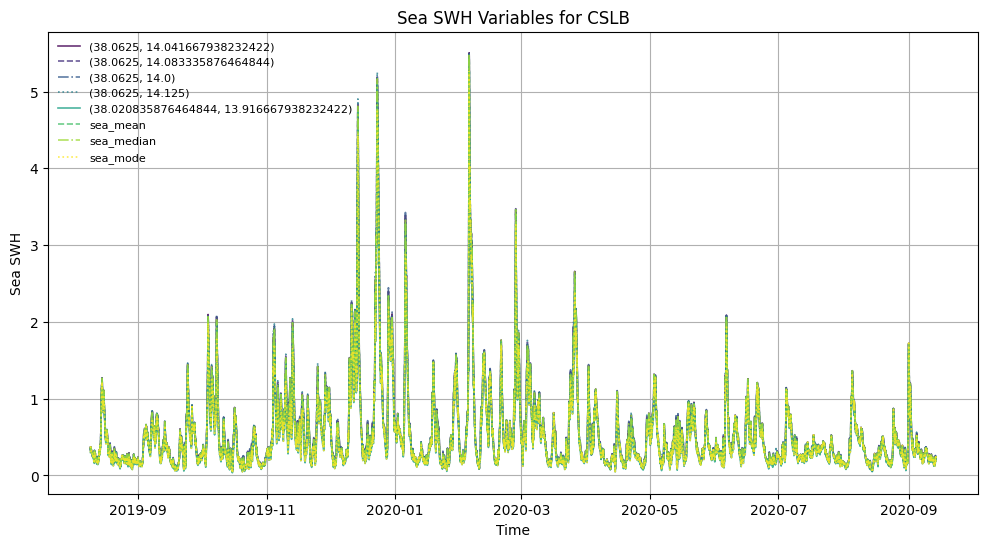

In [14]:
selected_station = station_list[2]

file_path = f"Processed Data/15.03.2025 Data/{selected_station}.parquet"
mlvariables = pd.read_parquet(file_path)

Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(selected_station)]
T = mlvariables.index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))

colors = cm.viridis(np.linspace(0, 1, len(Y.columns)))
linestyles = ['-', '--', '-.', ':']

for i, (col, color) in enumerate(zip(Y.columns, colors)):
    linestyle = linestyles[i % len(linestyles)]  #use different linestyles for better legibility
    ax.plot(T, Y[col], label=col, color=color, linestyle=linestyle, alpha=0.8, linewidth=1.2)

ax.set_xlabel("Time")
ax.set_ylabel("Sea SWH")
ax.legend(fontsize=8, loc="upper left", frameon=False)
ax.set_title(f"Sea SWH Variables for {selected_station}")
ax.grid(True)

plt.show()

# Plot SWH for All Stations

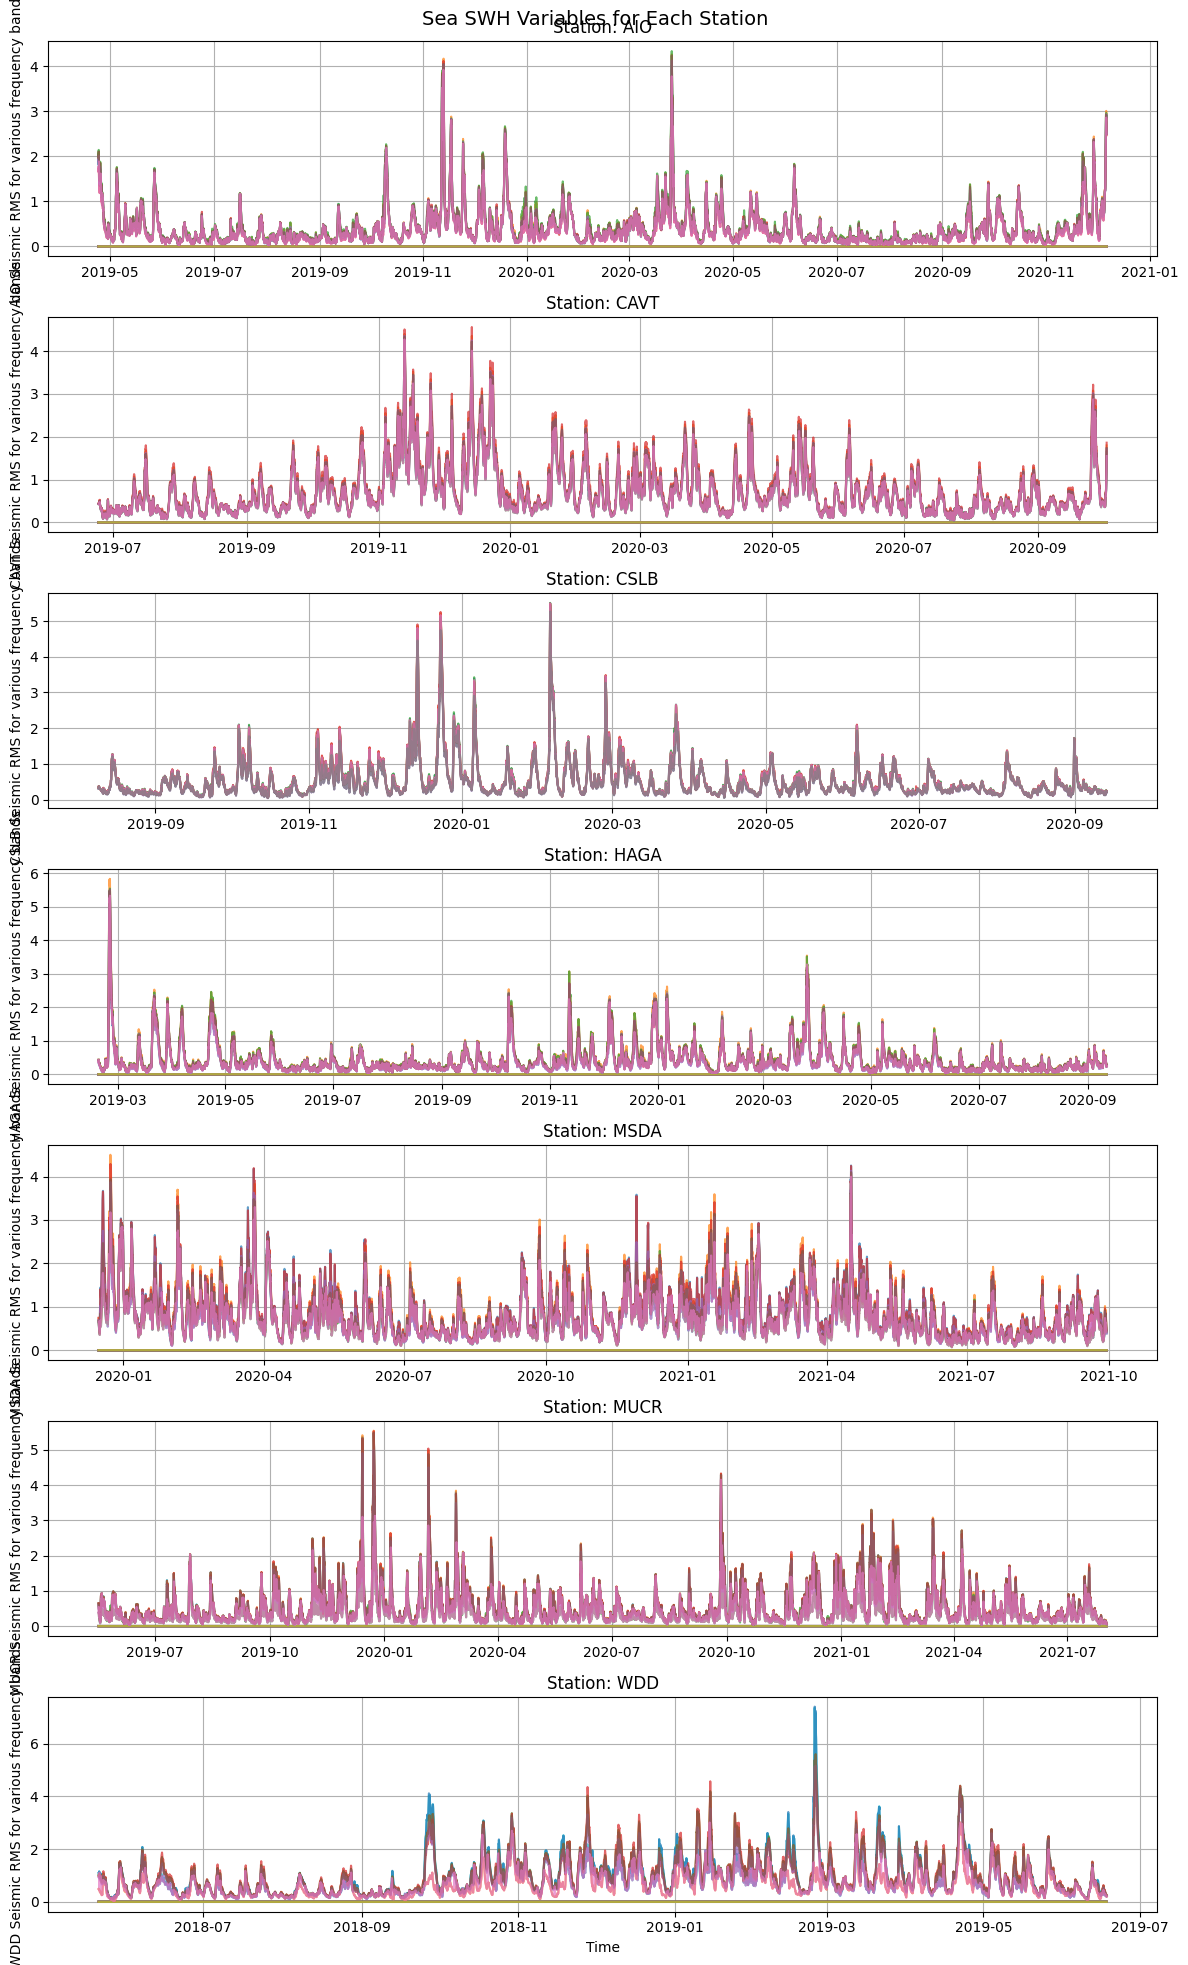

In [15]:
fig, axes = plt.subplots(7, 1, figsize=(12, 20))

for i, station in enumerate(station_list):
    mlvariables = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

    X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)]
    Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(selected_station)]
    T = mlvariables.index.tolist()
    
    ax = axes[i]
    for col in Y.columns:
        ax.plot(T, Y[col], label=f"{col}", alpha=0.7)

    ax.set_ylabel(f"{station} Seismic RMS for various frequency bands")
    #ax.legend(fontsize=8)
    ax.grid(True)
    ax.set_title(f"Station: {station}")

axes[-1].set_xlabel("Time")

fig.suptitle("Sea SWH Variables for Each Station", fontsize=14)
plt.tight_layout()
plt.show()

# Spearman Correlation Coefficient

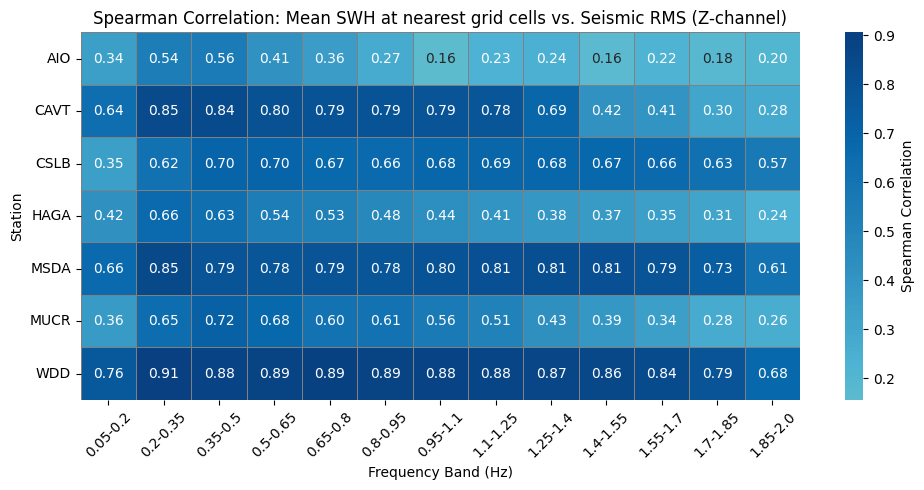

In [16]:
correlation_matrix = pd.DataFrame(index=station_list, columns=frequency_bands) # initialize the df

channel = 'Z'

for station in station_list:
    file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
    mlvariables = pd.read_parquet(file_path)
    
    if "sea_mean" not in mlvariables.columns:
        print(f"Skipping {station}: No 'sea_mean' column found.")
        continue
    
    for band in frequency_bands:
        seismic_col = f"{station}/{channel}/{band}"
        if seismic_col in mlvariables.columns:
            correlation, _ = spearmanr(mlvariables[seismic_col], mlvariables["sea_mean"])
            correlation_matrix.loc[station, band] = correlation
        else:
            correlation_matrix.loc[station, band] = np.nan

correlation_matrix = correlation_matrix.astype(float)

#create plot
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="GnBu", center=0,
            linewidths=0.5, linecolor="gray", cbar_kws={'label': 'Spearman Correlation'})

plt.title(f"Spearman Correlation: Mean SWH at nearest grid cells vs. Seismic RMS ({channel}-channel)")
plt.xlabel("Frequency Band (Hz)")
plt.ylabel("Station")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

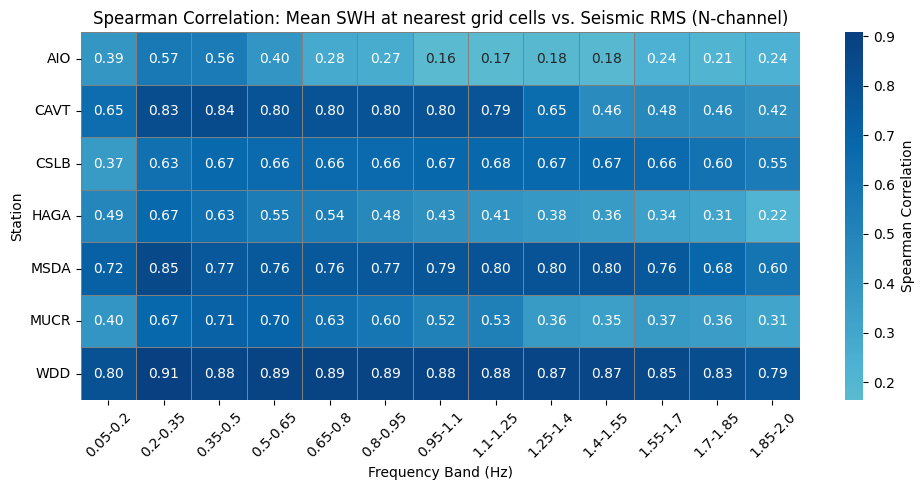

In [17]:
correlation_matrix = pd.DataFrame(index=station_list, columns=frequency_bands) # initialize the df

channel = 'N'

for station in station_list:
    file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
    mlvariables = pd.read_parquet(file_path)
    
    if "sea_mean" not in mlvariables.columns:
        print(f"Skipping {station}: No 'sea_mean' column found.")
        continue
    
    for band in frequency_bands:
        seismic_col = f"{station}/{channel}/{band}"
        if seismic_col in mlvariables.columns:
            correlation, _ = spearmanr(mlvariables[seismic_col], mlvariables["sea_mean"])
            correlation_matrix.loc[station, band] = correlation
        else:
            correlation_matrix.loc[station, band] = np.nan

correlation_matrix = correlation_matrix.astype(float)

#create plot
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="GnBu", center=0,
            linewidths=0.5, linecolor="gray", cbar_kws={'label': 'Spearman Correlation'})

plt.title(f"Spearman Correlation: Mean SWH at nearest grid cells vs. Seismic RMS ({channel}-channel)")
plt.xlabel("Frequency Band (Hz)")
plt.ylabel("Station")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

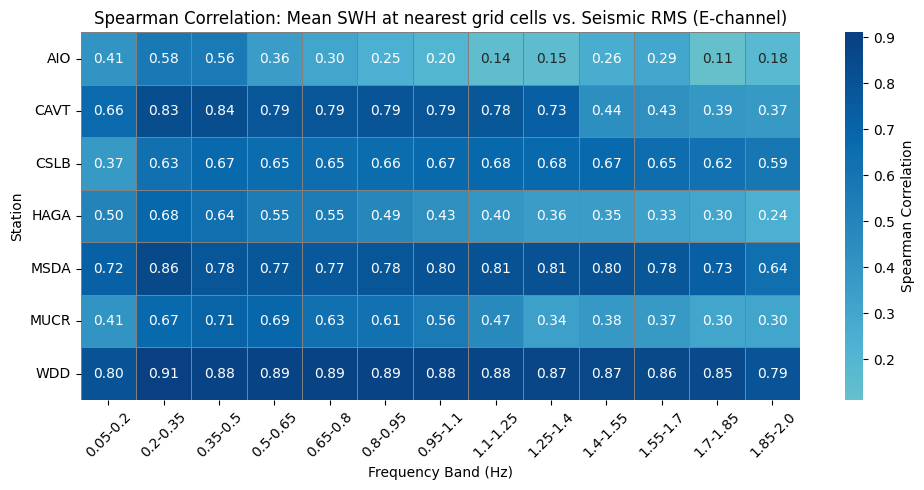

In [18]:
correlation_matrix = pd.DataFrame(index=station_list, columns=frequency_bands) # initialize the df

channel = 'E'

for station in station_list:
    file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
    mlvariables = pd.read_parquet(file_path)
    
    if "sea_mean" not in mlvariables.columns:
        print(f"Skipping {station}: No 'sea_mean' column found.")
        continue
    
    for band in frequency_bands:
        seismic_col = f"{station}/{channel}/{band}"
        if seismic_col in mlvariables.columns:
            correlation, _ = spearmanr(mlvariables[seismic_col], mlvariables["sea_mean"])
            correlation_matrix.loc[station, band] = correlation
        else:
            correlation_matrix.loc[station, band] = np.nan

correlation_matrix = correlation_matrix.astype(float)

#create plot
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="GnBu", center=0,
            linewidths=0.5, linecolor="gray", cbar_kws={'label': 'Spearman Correlation'})

plt.title(f"Spearman Correlation: Mean SWH at nearest grid cells vs. Seismic RMS ({channel}-channel)")
plt.xlabel("Frequency Band (Hz)")
plt.ylabel("Station")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Distance Between Seismic Stations and the Grid Cells

gps2dist_azimuth calculates distance in metres

In [19]:
distance_results = {}

for station, lat, lon in zip(station_list, station_lats, station_lons):
    distances = []
    for grid_lat, grid_lon in nearest_grid_points[station]:
        distance_meters, _, _ = gps2dist_azimuth(lat, lon, grid_lat, grid_lon)
        distances.append(distance_meters)
    
    distance_results[station] = distances

df_distances = pd.DataFrame.from_dict(distance_results, orient='index', columns=[f"Grid Cell {i+1}" for i in range(5)])

df_distances["Average"] = df_distances.mean(axis=1) #average distance per station

In [20]:
df_distances

Grid Cell 1   Grid Cell 2   Grid Cell 3   Grid Cell 4   Grid Cell 5  \
AIO   12156.886282  13028.450109  15029.224613  15698.384376  16164.660200   
CAVT  13071.092335  13338.138617  13816.870752  14558.469784  15424.584795   
CSLB  13691.741310  13750.212669  14582.582847  14746.970587  15457.528835   
HAGA   2566.804544   3983.051863   4957.139856   7149.857639   7771.200455   
MSDA   6372.582523   8719.071578   8730.800199   9029.097651   9581.881819   
MUCR  16378.168653  16685.641960  17753.953958  18111.199859  18415.058250   
WDD    5658.789074   6007.614667   6559.879588   7546.062605   7695.815968   

           Average  
AIO   14415.521116  
CAVT  14041.831257  
CSLB  14445.807250  
HAGA   5285.610871  
MSDA   8486.686754  
MUCR  17468.804536  
WDD    6693.632380

C:\Users\erika\AppData\Local\Temp\ipykernel_15104\1278169442.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('GnBu', len(grids))


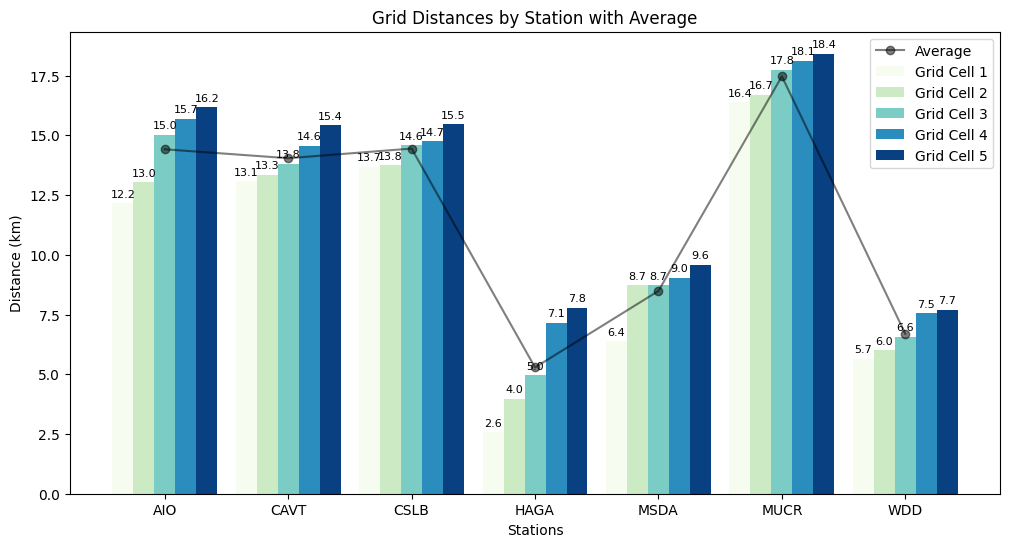

In [21]:
stations_dist = df_distances.index.values
grids = ["Grid Cell 1", "Grid Cell 2", "Grid Cell 3", "Grid Cell 4", "Grid Cell 5"]
values = df_distances[grids].values/1000
averages = df_distances["Average"].values/1000

x = np.arange(len(stations_dist))
width = 0.17  #width of columns in bar chart

fig, ax = plt.subplots(figsize=(12, 6))

cmap = cm.get_cmap('GnBu', len(grids))
colors = [cmap(i) for i in range(len(grids))]

for i in range(len(grids)):
    bars = ax.bar(x+(i-2)*width, values[:, i], width, label=grids[i], color=colors[i])
    ax.bar_label(bars, fmt='%.1f', padding=3, fontsize=8, label_type='edge')

ax.plot(x, averages, marker='o', color='black', linestyle='-', label='Average', alpha=0.5)

ax.set_xlabel("Stations")
ax.set_ylabel("Distance (km)")
ax.set_title("Grid Distances by Station with Average")
ax.set_xticks(x)
ax.set_xticklabels(stations_dist)
ax.legend()

plt.show()

# Correlation vs Distance

In [22]:
avg_distances = pd.DataFrame(df_distances["Average"]/1000)
avg_distances

Average
AIO   14.415521
CAVT  14.041831
CSLB  14.445807
HAGA   5.285611
MSDA   8.486687
MUCR  17.468805
WDD    6.693632

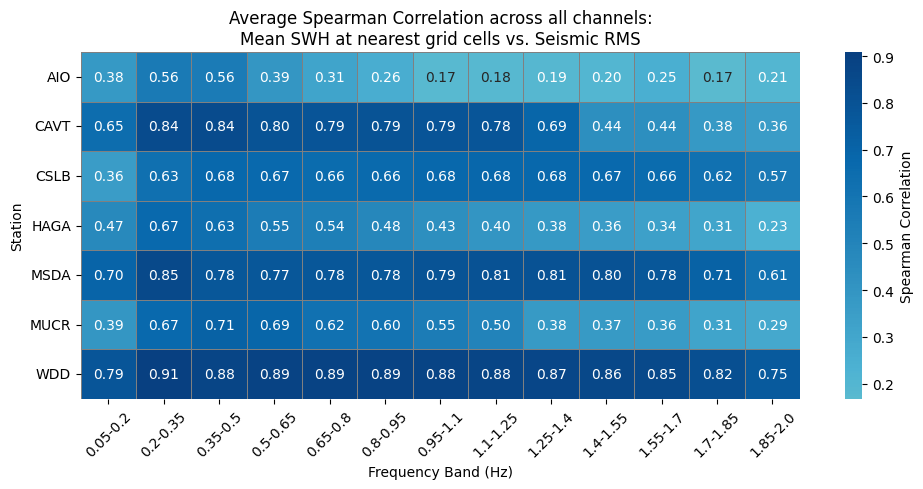

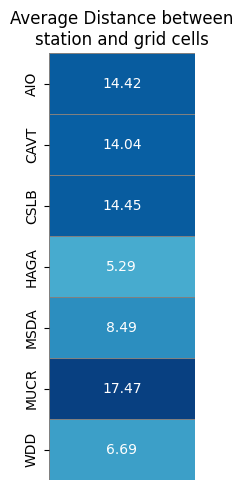

In [23]:
for station in station_list:
    file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
    mlvariables = pd.read_parquet(file_path)
    
    if "sea_mean" not in mlvariables.columns:
        print(f"Skipping {station}: No 'sea_mean' column found.")
        continue

    #initialise list for avg correlations across channels
    avg_correlations = []

    for band in frequency_bands:
        combined_seismic_data = []
        correlations_per_channel = []
        
        for channel in channels:
            seismic_col = f"{station}/{channel}/{band}"
            if seismic_col in mlvariables.columns:
                seismic_data = mlvariables[seismic_col].values
                combined_seismic_data.append(seismic_data)
                
                correlation, _ = spearmanr(seismic_data, mlvariables["sea_mean"])
                correlations_per_channel.append(correlation)
            else:
                #if the data is missing, pad with nans
                combined_seismic_data.append(np.nan * len(mlvariables))
        
        #average correlation across channels
        avg_correlation = np.nanmean(correlations_per_channel)
        correlation_matrix.loc[station, band] = avg_correlation

correlation_matrix = correlation_matrix.astype(float)

#correlation Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="GnBu", center=0,
            linewidths=0.5, linecolor="gray", cbar_kws={'label': 'Spearman Correlation'})

plt.title(f"Average Spearman Correlation across all channels:\nMean SWH at nearest grid cells vs. Seismic RMS")
plt.xlabel("Frequency Band (Hz)")
plt.ylabel("Station")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot the distance from average for each station
plt.figure(figsize=(2, 5))
sns.heatmap(avg_distances, annot=True, fmt=".2f", cmap="GnBu", center=0, xticklabels=False,
            linewidths=0.5, linecolor="gray", cbar=False)

plt.title(f"Average Distance between\nstation and grid cells")
plt.tight_layout()
plt.show()

# Autocorrelation Decay
Low Autocorrelation Decay: The correlation between values over time decreases slowly as the lag increases

Keep in mind that ongoing processes and similar weather to hour 1 might contribute to increased correlation for a longer period of time.

In [24]:
def autocorrelation(x):
    #compute the autocorrelation of the signal 'x' using cross-correlation.=
    result = correlate(x, x, mode='full')
    autocorr = result[result.size // 2:]  #keep only the positive lags
    autocorr /= autocorr[0]  #normalize so that autocorr[0] = 1
    return autocorr

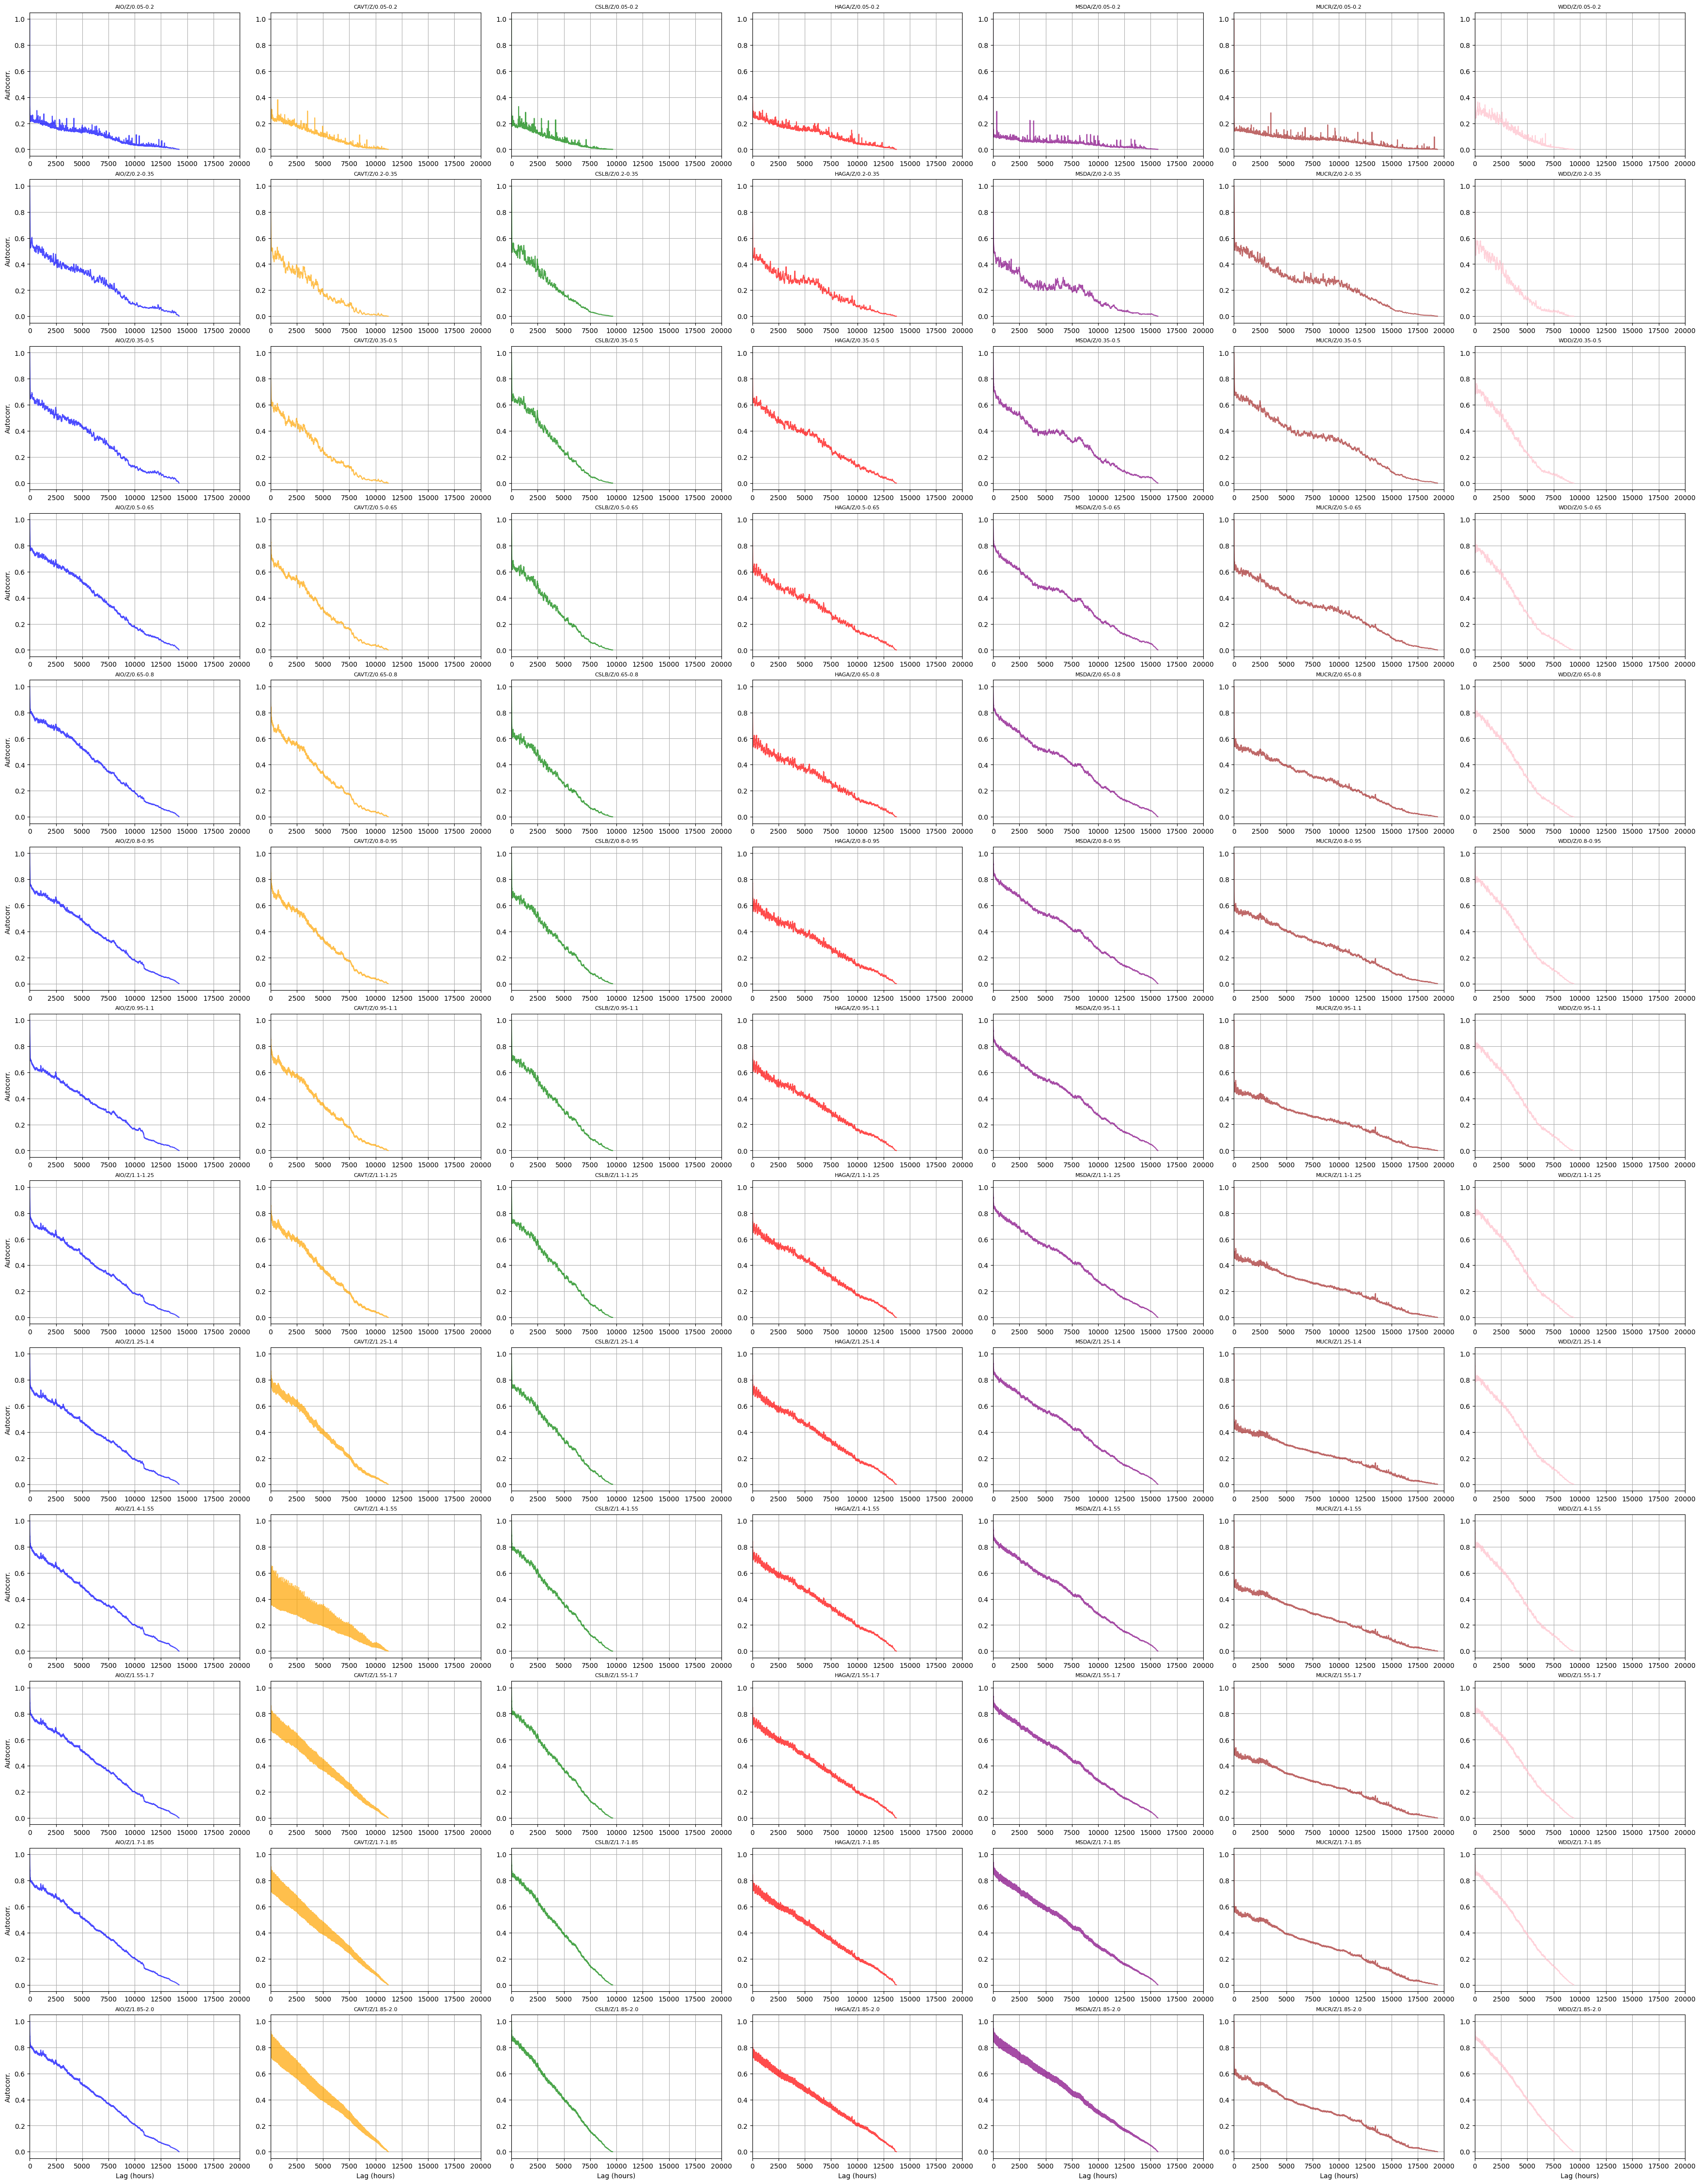

In [25]:
fig, axes = plt.subplots(nrows=13, ncols=7, figsize=(35, 45), constrained_layout=True)

for i, station in enumerate(station_list):
    file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
    mlvariables = pd.read_parquet(file_path)

    X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)]
    columns = X.columns[:13] #first 13 columns for freq bands
    
    for j, column in enumerate(columns):
        autocorr = autocorrelation(X[column].values)
        axes[j, i].plot(autocorr, alpha=0.7, color=station_colours[i])
        axes[j, i].set_title(f"{column}", fontsize=8)
        axes[j, i].grid(True)
        axes[j, i].set_xlim(0, 20000) #manually set xlim to compare decay easily
    
for j in range(7):
    axes[-1, j].set_xlabel("Lag (hours)")

for i in range(13):
    axes[i, 0].set_ylabel("Autocorr.")

plt.show()

In [26]:
nfreq = 13

cmap_2 = cm.get_cmap('ocean', nfreq)
colors_2 = [cmap_2(i) for i in range(nfreq)]

C:\Users\erika\AppData\Local\Temp\ipykernel_15104\1054037174.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_2 = cm.get_cmap('ocean', nfreq)


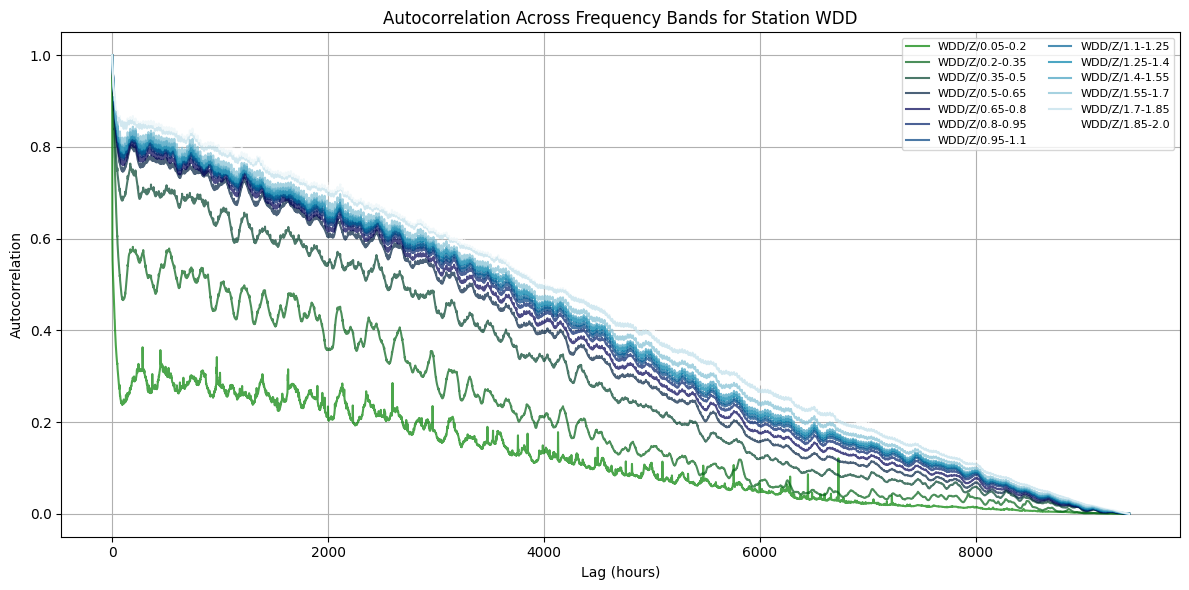

In [27]:
station = 'WDD'

file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
mlvariables = pd.read_parquet(file_path)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)]
columns = X.columns[:nfreq] #first 13 columns for freq bands

fig, ax = plt.subplots(figsize=(12, 6))

for j, column in enumerate(columns):
    autocorr = autocorrelation(X[column].values)
    ax.plot(autocorr, alpha=0.7, color=colors_2[j], label=column)
    
#ax.set_xlim(0, 15000)
ax.set_xlabel("Lag (hours)")
ax.set_ylabel("Autocorrelation")
ax.set_title(f"Autocorrelation Across Frequency Bands for Station {station}")
ax.grid(True)
ax.legend(fontsize=8, loc='upper right', ncol=2)

plt.tight_layout()
plt.show()

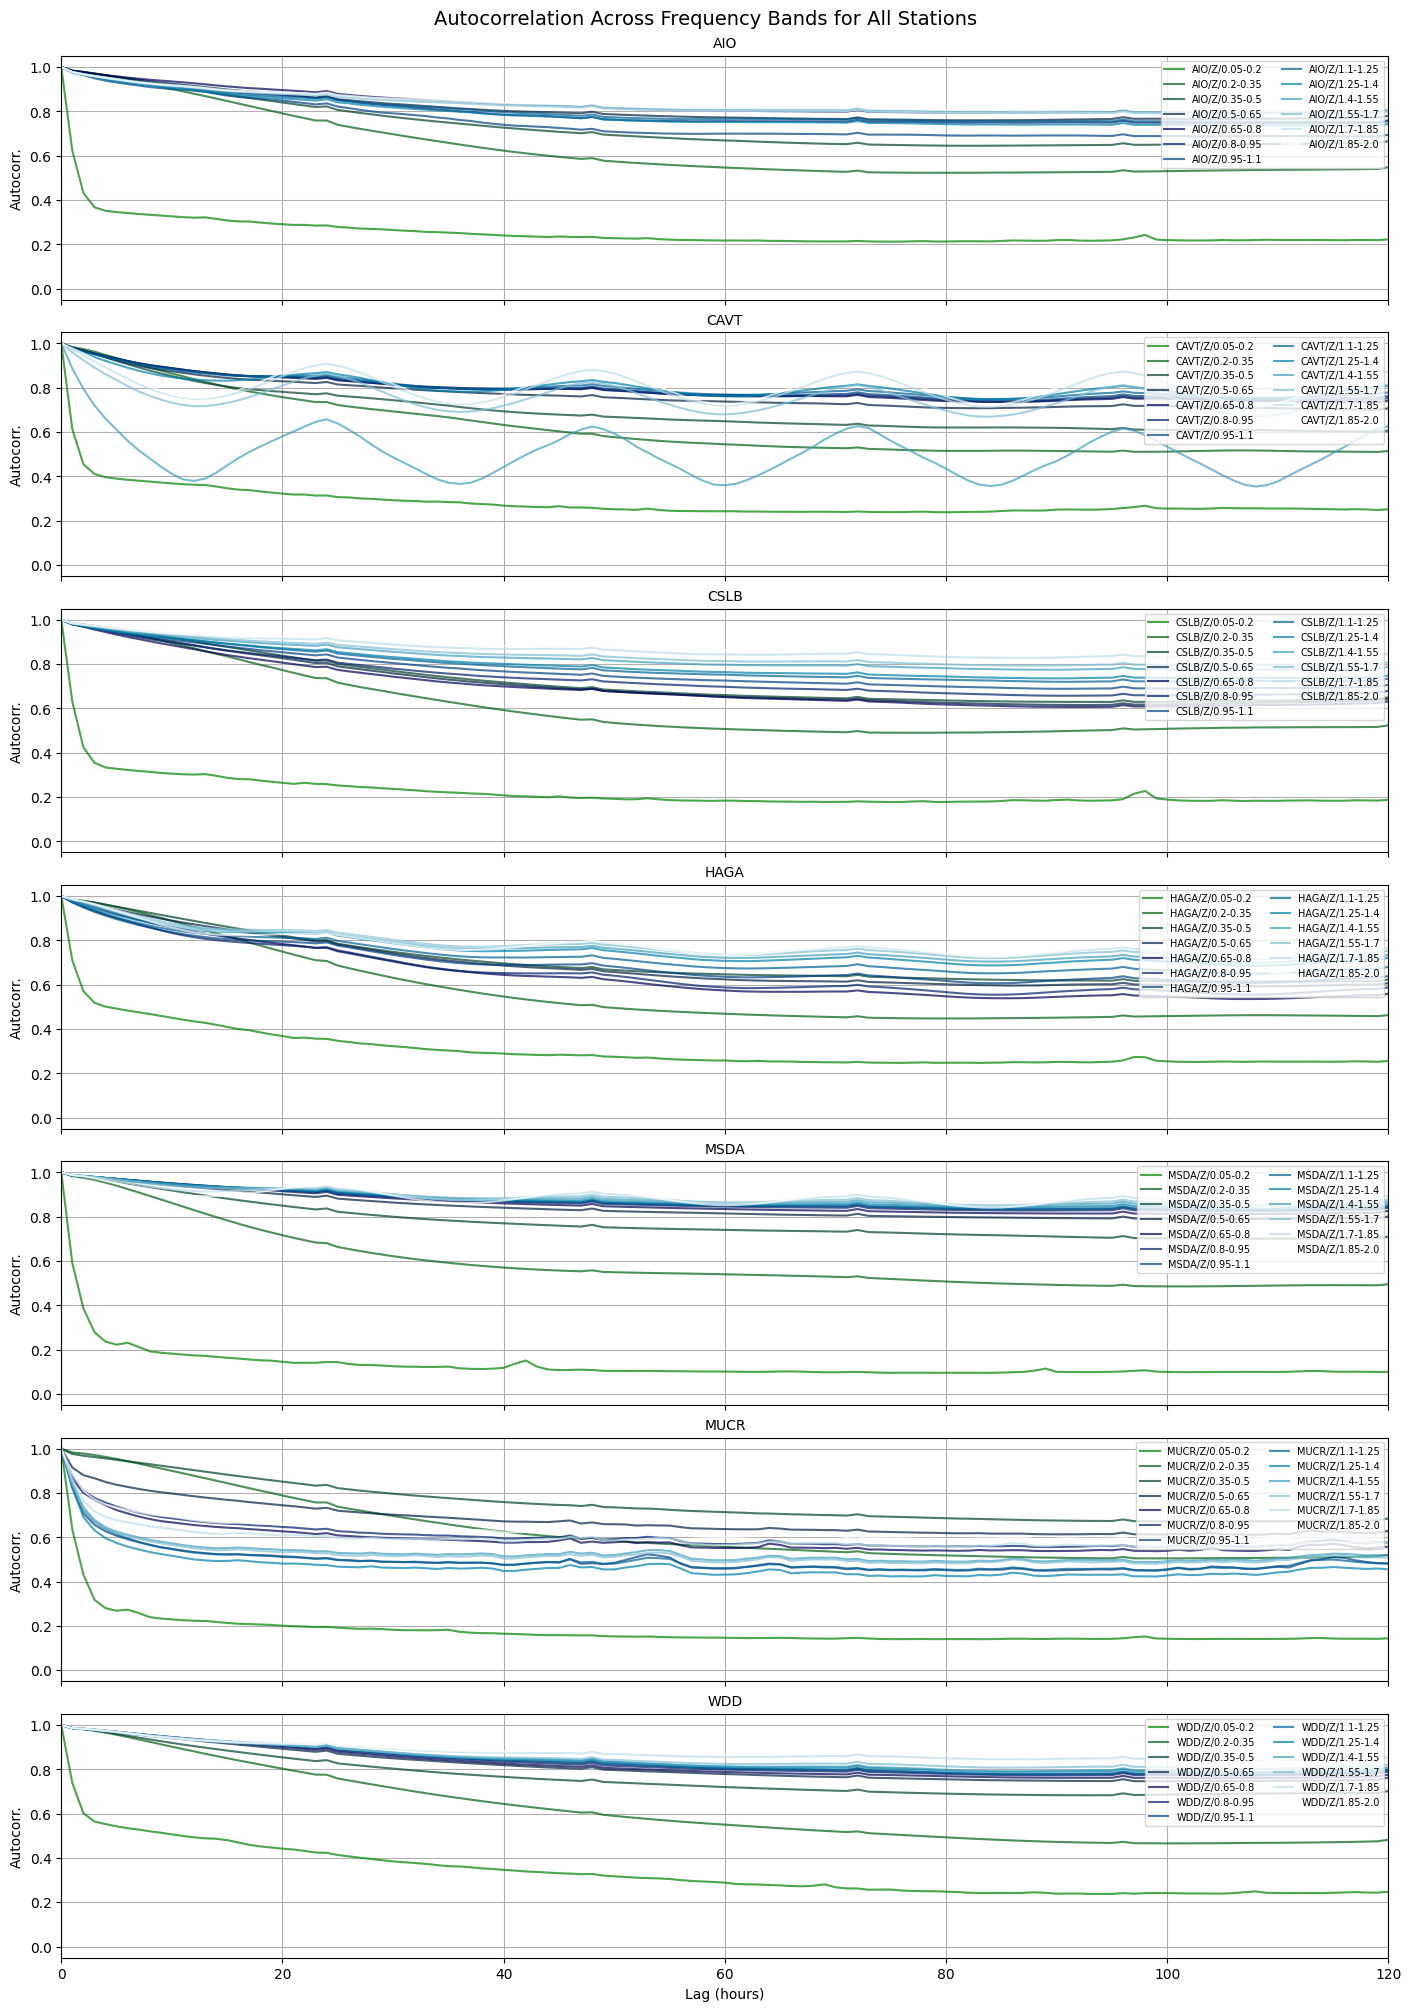

In [32]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True, constrained_layout=True)
for i, station in enumerate(station_list):
    file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
    mlvariables = pd.read_parquet(file_path)

    X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)]
    columns = X.columns[:nfreq]

    ax = axes[i]
    for j, column in enumerate(columns):
        autocorr = autocorrelation(X[column].values)
        ax.plot(autocorr, alpha=0.7, color=colors_2[j], label=column)
    
    ax.set_ylabel("Autocorr.")
    ax.set_title(f"{station}", fontsize=10)
    ax.grid(True)
    ax.set_xlim(0, 24*5)
    ax.legend(fontsize=7, loc='upper right', ncol=2)

    if i == len(station_list) - 1:
        ax.set_xlabel("Lag (hours)")

plt.suptitle("Autocorrelation Across Frequency Bands for All Stations", fontsize=14)
plt.show()

# Skewness

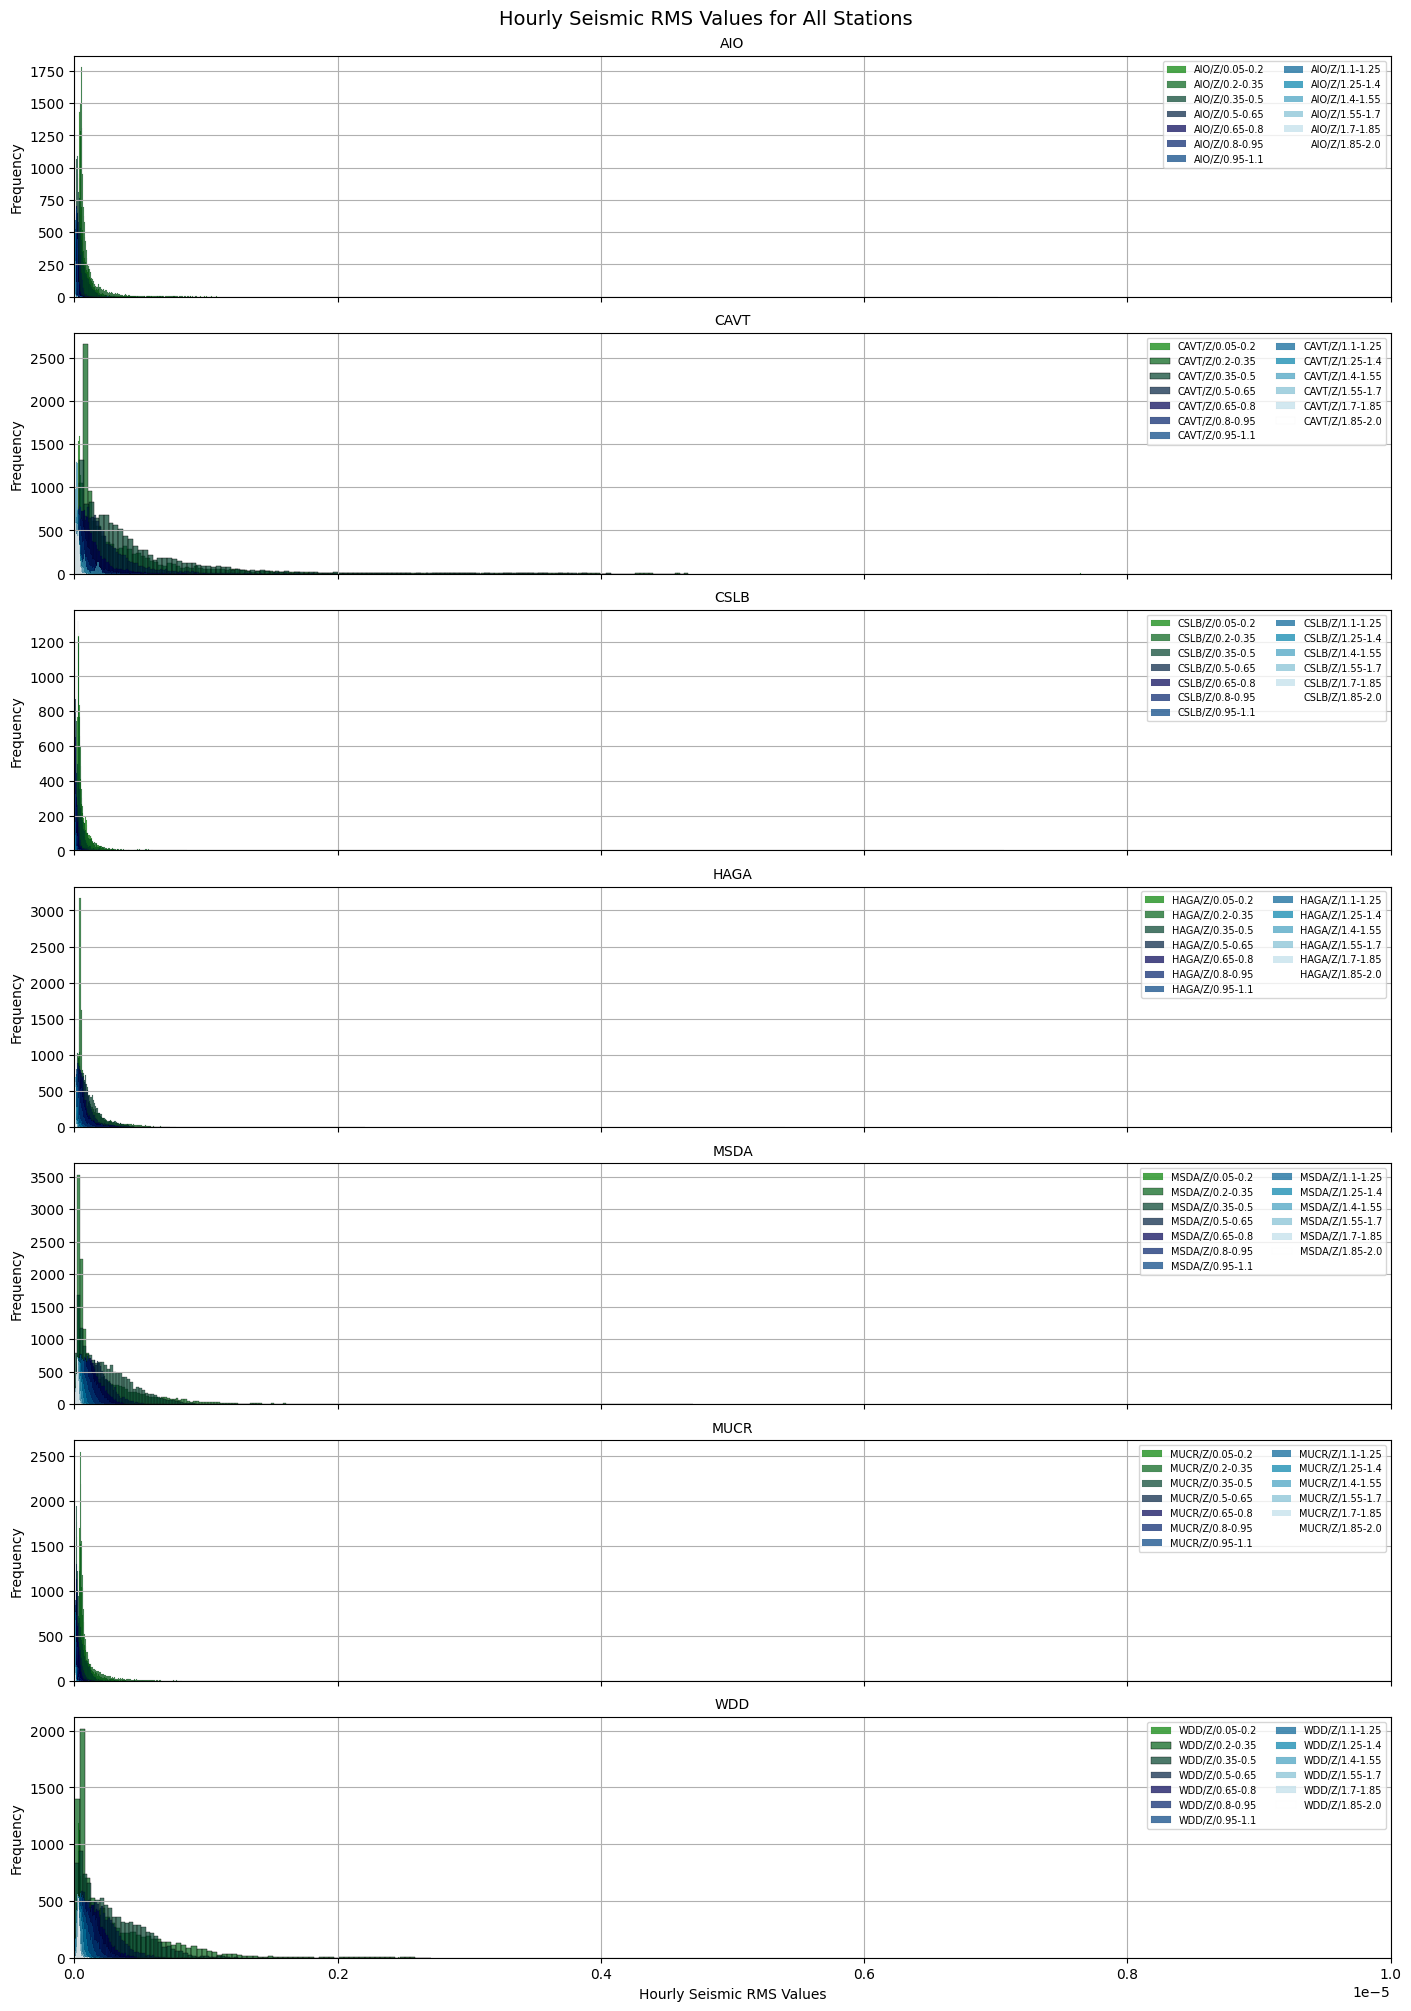

In [39]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True, constrained_layout=True)
for i, station in enumerate(station_list):
    file_path = f"Processed Data/15.03.2025 Data/{station}.parquet"
    mlvariables = pd.read_parquet(file_path)

    X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)]
    columns = X.columns[:nfreq]

    ax = axes[i]
    for j, column in enumerate(columns):
        sns.histplot(X[column].values, alpha=0.7, color=colors_2[j], edgecolor='black', ax=ax, label=column)
    
    ax.set_ylabel("Frequency")
    ax.set_title(f"{station}", fontsize=10)
    ax.grid(True)
    ax.set_xlim(0, 1e-5)
    ax.legend(fontsize=7, loc='upper right', ncol=2)

    if i == len(station_list) - 1:
        ax.set_xlabel("Hourly Seismic RMS Values")

plt.suptitle("Hourly Seismic RMS Values for All Stations", fontsize=14)
plt.show()